In [1]:
import re
import warnings
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from statannot import add_stat_annotation

from utils import quick_load_liuzhong_health_check_data
from plot_utils import Stack, Scatter, Sankey, BxxPvalue

%matplotlib inline
%load_ext autoreload
%autoreload 2
warnings.filterwarnings("ignore")

df_table1plus, l_consecute_man2p, l_consecute_man3p, df_table1plus_3p_revMM, df_meta_group, rename_dict = quick_load_liuzhong_health_check_data()
workdir = "/cluster/home/bqhu_jh/projects/healthman/analysis/liuzhong/human/clinical/figures"

# ECG Overall

## Scatter plot results

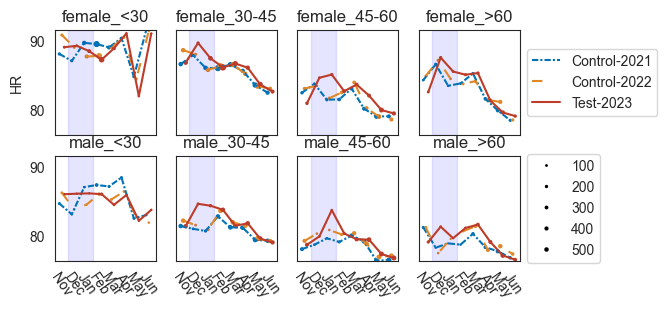

In [2]:
l_months2 = [11,12,1,2,3,4,5,6]

tag = "v000763"
plt_scatter = Scatter(n_cols=5, figsize=(6,3), n_rows=5, rename_dict=rename_dict)
fig,df_scatter_3p = plt_scatter.plot_scatter_ax_plus(df_table1plus_3p_revMM, x="month", y=tag, hue="period", 
                                                         order=[11,12,1,2,3,4,5,6], hue_order=["Control-2021", "Control-2022", "Test-2023"])
fig.savefig(f"{workdir}/FigureS2_A.pdf")

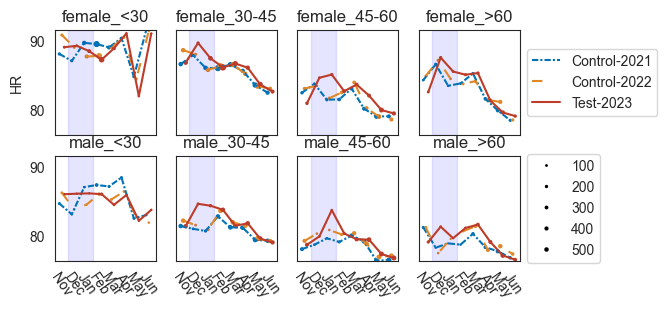

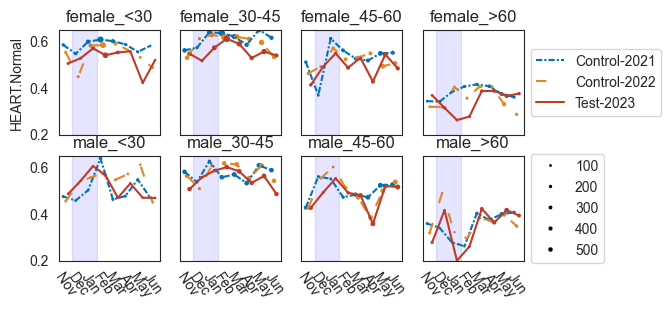

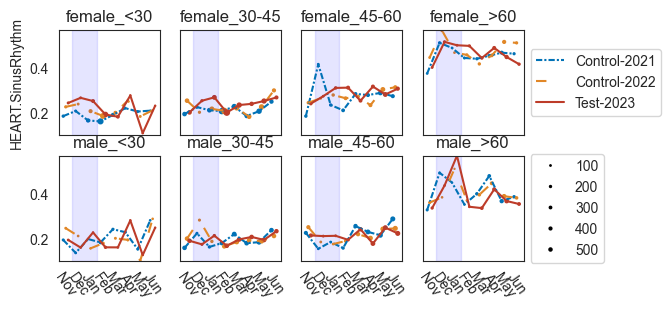

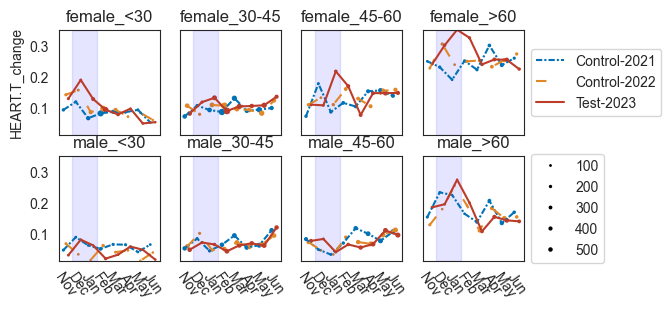

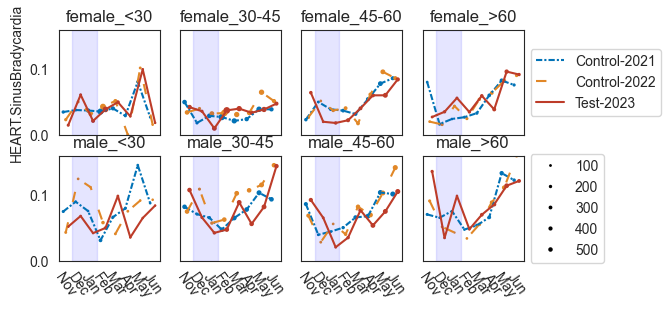

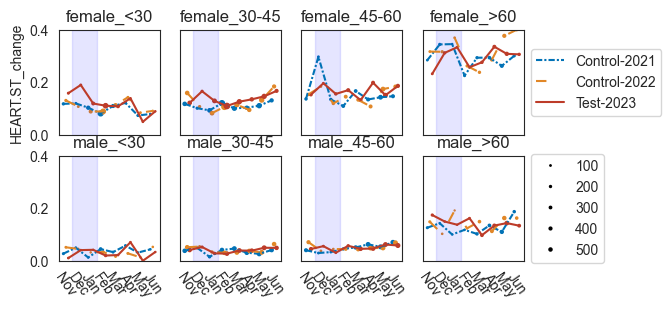

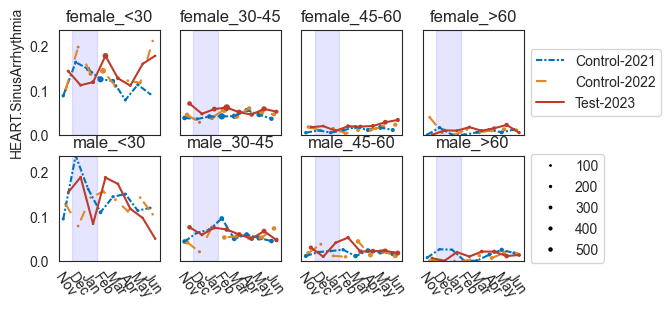

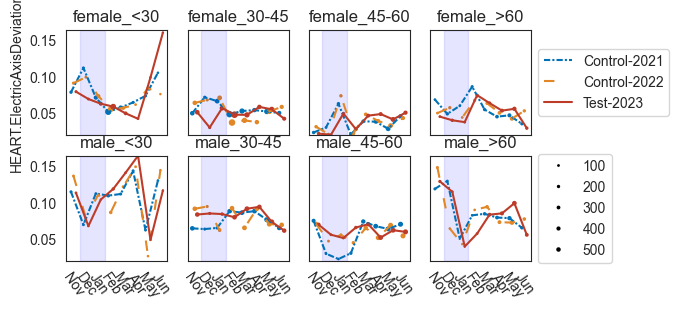

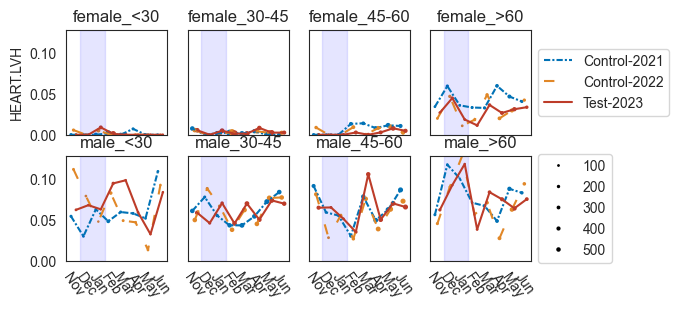

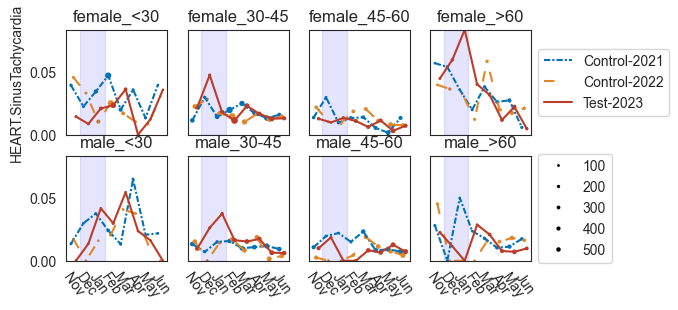

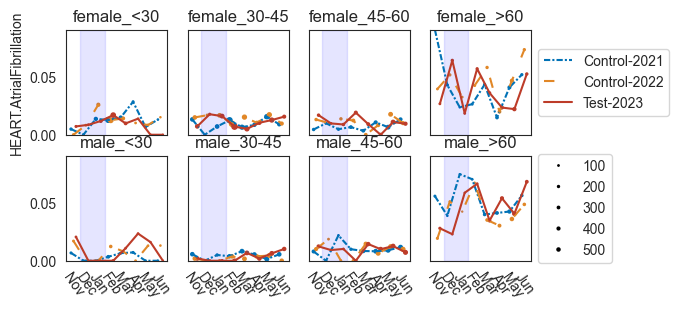

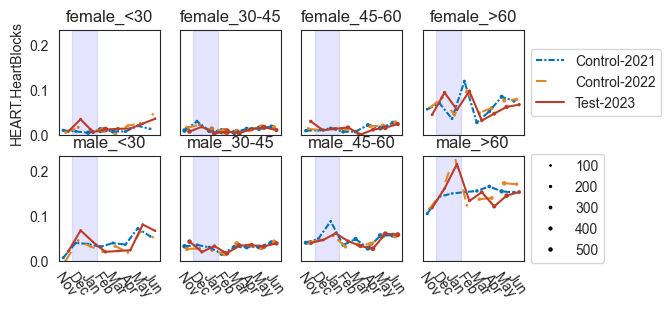

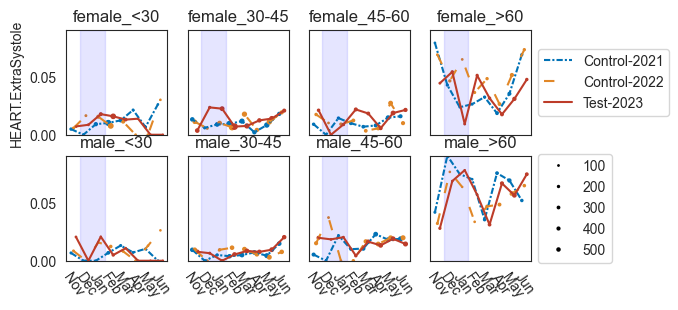

In [3]:
for tag in [ "v000763",
        'HEART.Normal',
        'HEART.SinusRhythm', 'HEART.T_change', 'HEART.SinusBradycardia',
        'HEART.ST_change', 'HEART.SinusArrhythmia',
        'HEART.ElectricAxisDeviation', 'HEART.LVH', 'HEART.SinusTachycardia',
        'HEART.AtrialFibrillation', 'HEART.HeartBlocks', 'HEART.ExtraSystole'
    ]:
    fig,df_scatter_3p = plt_scatter.plot_scatter_ax_plus(df_table1plus_3p_revMM, tag, order=l_months2)


len                                      \
month                            1     2    3    4    5    6    11   12   
gender age_groups period                                                  
female 30-45      Control-2021  560  1272  764  466  831  443  527  168   
                  Control-2022  595  1371  786  486  810  413  534  177   
                  Test-2023     620  1415  786  482  786  383  552  169   
       45-60      Control-2021  208   302  288  372  609  375  220  101   
                  Control-2022  218   324  293  362  621  398  228   98   
                  Test-2023     225   365  326  353  638  419  236  102   
       <30        Control-2021  437  1171  402  140  150   76  204  134   
                  Control-2022  384  1037  353   98  119   66  176  121   
                  Test-2023     336   941  305   72   81   56  139  116   
       >60        Control-2021   84   151  184  269  366  173   88  186   
                  Control-2022   92   164  206  301  406  190  101  193   
                  Test-2023     108   175  221  340  451  209  112  202   
male   30-45      Control-2021  200   511  604  556  682  539  528  142   
                  Control-2022  211   531  599  536  655  520  525  148   
                  Test-2023     214   552  590  521  627  490  515  153   
       45-60      Control-2021   91   200  474  609  660  685  374  102   
                  Control-2022   90   225  478  622  655  704  396  107   
                  Test-2023      98   229  485  600  631  689  403  108   
       <30        Control-2021   80   292  152  139   97   92  148  101   
                  Control-2022   63   243  123  107   77   76  117   89   
                  Test-2023      48   202   92   85   62   60   97   74   
       >60        Control-2021   40    85  225  290  446  230  143   77   
                  Control-2022   47    89  255  329  498  246  155   78   
                  Test-2023      51   105  288  388  565  307  178   87   

                                    mean            ... func_q5      func_q95  \
month                                 1         2   ...      11   12       1    
gender age_groups period                            ...                         
female 30-45      Control-2021  0.092857  0.086478  ...     0.0  0.0      0.0   
                  Control-2022  0.109244  0.106492  ...     0.0  0.0      0.0   
                  Test-2023     0.132258  0.089753  ...     0.0  0.0      0.0   
       45-60      Control-2021  0.086538  0.115894  ...     0.0  0.0      0.0   
                  Control-2022  0.110092  0.160494  ...     0.0  0.0      0.0   
                  Test-2023     0.217778  0.169863  ...     0.0  0.0      0.0   
       <30        Control-2021  0.066362  0.081981  ...     0.0  0.0      0.0   
                  Control-2022  0.085938  0.097396  ...     0.0  0.0      0.0   
                  Test-2023     0.127976  0.093518  ...     0.0  0.0      0.0   
       >60        Control-2021  0.190476  0.251656  ...     0.0  0.0      0.0   
                  Control-2022  0.239130  0.250000  ...     0.0  0.0      0.0   
                  Test-2023     0.351852  0.325714  ...     0.0  0.0      0.0   
male   30-45      Control-2021  0.045000  0.064579  ...     0.0  0.0      0.0   
                  Control-2022  0.047393  0.050847  ...     0.0  0.0      0.0   
                  Test-2023     0.065421  0.043478  ...     0.0  0.0      0.0   
       45-60      Control-2021  0.032967  0.070000  ...     0.0  0.0      0.0   
                  Control-2022  0.033333  0.088889  ...     0.0  0.0      0.0   
                  Test-2023     0.040816  0.065502  ...     0.0  0.0      0.0   
       <30        Control-2021  0.062500  0.051370  ...     0.0  0.0      0.0   
                  Control-2022  0.015873  0.061728  ...     0.0  0.0      0.0   
                  Test-2023     0.062500  0.019802  ...     0.0  0.0      0.0   
       >60        Control-2021  0.225000  0.164706  ...     0.

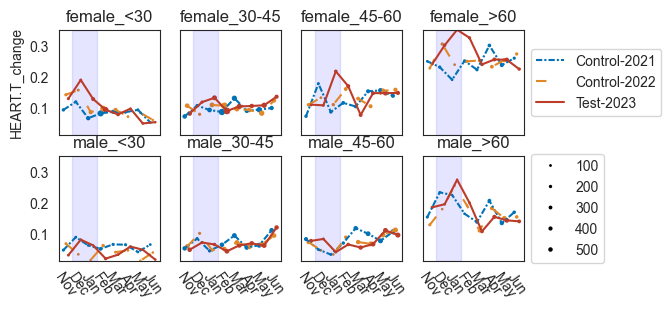

In [4]:
tag = 'HEART.T_change'
fig, df_res = plt_scatter.plot_scatter_ax_plus(df_table1plus_3p_revMM, tag, order=l_months2)
fig.savefig(f"{workdir}/Figure2_B.pdf")
df_res

## Stackplot for different types of ECG results.

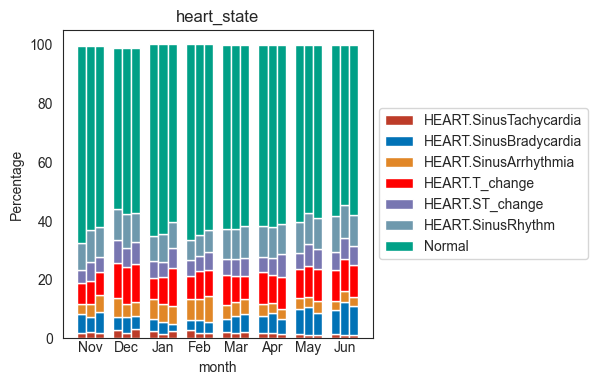

In [5]:
x = "month"
order= [11,12, 1,2,3, 4,5,6]
hue = "period"
hue_order = ["Control-2021", "Control-2022", "Test-2023"]
y = "heart_state"
y_order = ["HEART.SinusTachycardia",  "HEART.SinusBradycardia", "HEART.SinusArrhythmia","HEART.T_change", "HEART.ST_change", "HEART.SinusRhythm"]
pal = ["#BD3C29", "#0172B6", "#E18727", "#FF0000", "#7876B1", "#6F99AD", "#00A087", "#EE4C97"]

stack_plot = Stack(figsize=(4,4))
fig,df_tmp = stack_plot.plot_bar_stacked(df_table1plus_3p_revMM, x, hue, y, y_order, order=order, hue_order=hue_order, 
            cmap=pal)
fig.savefig(f"{workdir}/Figure2_A.pdf")

## sankey plots

In [6]:

df_cnt = pd.melt(
    df_table1plus_3p_revMM[
        ["sample_id",'HEART.Normal', 'HEART.T_change', 'HEART.ST_change', 
                 "period", "month", "age_groups","gender"]
    ],id_vars = ["sample_id", "month", "period", "age_groups", "gender"]).\
    pivot(index=["sample_id","variable", "month", "age_groups", "gender"], columns="period", values="value").\
    reset_index().drop(["sample_id"], axis=1).value_counts().reset_index()

df_cnt_sub = df_cnt[(df_cnt["variable"]=="HEART.T_change") &
                    (df_cnt["month"]==1) & (df_cnt["gender"]=="female") &
                    (df_cnt["age_groups"]==">60")
]
df_cnt_sub = df_cnt[(df_cnt["variable"]=="HEART.T_change") &
                    (df_cnt["month"]==1) &
                    (df_cnt["gender"]=="female") &
                    (df_cnt["age_groups"]=="45-60")
]

print(df_cnt_sub.to_markdown())

|      | variable       |   month | age_groups   | gender   |   Control-2021 |   Control-2022 |   Test-2023 |   0 |
|-----:|:---------------|--------:|:-------------|:---------|---------------:|---------------:|------------:|----:|
|   94 | HEART.T_change |       1 | 45-60        | female   |              0 |              0 |           0 | 136 |
|  421 | HEART.T_change |       1 | 45-60        | female   |              0 |              0 |           1 |  24 |
|  929 | HEART.T_change |       1 | 45-60        | female   |              0 |              1 |           1 |   7 |
| 1026 | HEART.T_change |       1 | 45-60        | female   |              1 |              0 |           1 |   5 |
| 1030 | HEART.T_change |       1 | 45-60        | female   |              1 |              1 |           1 |   5 |
| 1247 | HEART.T_change |       1 | 45-60        | female   |              1 |              0 |           0 |   3 |
| 1252 | HEART.T_change |       1 | 45-60        | female   |           

In [7]:
l_pairs = [["Control-2021","Control-2022"], ["Control-2022","Test-2023"]]
month = 1
tag = "HEART.T_change"
l_age_groups = ["<30", "30-45", "45-60", ">60"]

plt_sankey = Sankey(rename_dict=rename_dict)

fig, sankey_dict = plt_sankey.plot_sankey_subplots(df_cnt, [11,12], tag, l_age_groups, l_pairs)
fig.show()
fig, sankey_dict = plt_sankey.plot_sankey_subplots(df_cnt, [3,4], tag, l_age_groups, l_pairs)
fig.show()
fig, sankey_dict = plt_sankey.plot_sankey_subplots(df_cnt, [1,2], tag, l_age_groups, l_pairs)
fig.show()

import plotly.io as pio
pio.write_image(fig,
                f"{workdir}/Figure2_C.pdf"
)

In [8]:
l_pairs = [["Control-2021","Control-2022"], ["Control-2022","Test-2023"]]
month = 1
tag = "HEART.T_change"
l_age_groups = ["<30", "30-45", "45-60", ">60"]

plt_sankey = Sankey(rename_dict=rename_dict)

fig, sankey_dict = plt_sankey.plot_sankey_subplots(df_cnt, [11,12], tag, l_age_groups, l_pairs)
fig.show()
fig, sankey_dict = plt_sankey.plot_sankey_subplots(df_cnt, [3,4], tag, l_age_groups, l_pairs)
fig.show()
fig, sankey_dict = plt_sankey.plot_sankey_subplots(df_cnt, [1,2], tag, l_age_groups, l_pairs)
fig.show()

import plotly.io as pio
# pio.write_image(fig,
#                 f"{workdir}/Figure2_C.pdf"
# )